# Natural Language Processing Semester Project 

**Problem Explanation**

The **intent classification** problem in NLP involves predicting the intention or purpose behind a given text input, such as a user query, with the goal of providing an appropriate response or action.

**Goal**

Baed on the input of the customer, our model can link predict the intent class



# Installation Step 



In [1]:
# Installation of dependences

!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.3 MB/s eta 0:00:0

# Importing Libraries 

In [2]:
import tensorflow as tf### models
import numpy as np### math computations
import matplotlib.pyplot as plt### plotting bar chart
import sklearn### machine learning library
import cv2## image processing
from sklearn.metrics import confusion_matrix, roc_curve### metrics
import seaborn as sns### visualizations
import datetime
import pathlib
import io
import os
import re
import string
import time
from pprint import pprint

from numpy import random
import gensim.downloader as api
from PIL import Image
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Dense,Flatten,InputLayer,BatchNormalization,Dropout,Input,LayerNormalization
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import (BinaryAccuracy, FalsePositives, FalseNegatives, TruePositives,
                                       TrueNegatives, Precision, Recall, AUC, binary_accuracy,Accuracy,
                                       TopKCategoricalAccuracy, CategoricalAccuracy,SparseCategoricalAccuracy)
from tensorflow.keras.optimizers import Adam
from google.colab import drive
from google.colab import files
from datasets import load_dataset
from transformers import (BertTokenizerFast,TFBertTokenizer,BertTokenizer,RobertaTokenizerFast,
                          DataCollatorWithPadding,TFRobertaForSequenceClassification,TFBertForSequenceClassification,
                          TFBertModel,create_optimizer,TFDebertaForSequenceClassification,DebertaTokenizerFast)

# Data Preperation Step

In [3]:
# Linking the colab envirnoment with our google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Getting the Dataset:

## Dataset Name : **Bitext Sample Pre-built Customer Support Dataset for English**

### Dataset Explanation
This dataset contains example utterances and their corresponding intents from the Customer Support domain. The data can be used to train intent recognition models Natural Language Understanding (NLU) platforms.

The dataset covers the "Customer Support" domain and includes 27 intents grouped in 11 categories. These intents have been selected from Bitext's collection of 20 domain-specific datasets (banking, retail, utilities…), keeping the intents that are common across domains. See below for a full list of categories and intents.

## Source of Dataset



1.   Dataset hosted on Kaggle.com
2.   Bitext Sample Pre-built Customer Support Dataset for English : [Link to dataset](https://www.kaggle.com/datasets/536db59649ec509a2808c8d2c85d560c64e1dce44778a22ab79ce3408813e8fb)





# Importing the dataset From Kaggle

In [7]:
# from kaggle get the json file of the dataset hosted online
# path_to_kaggle_json ="/content/drive/MyDrive/Google\ Colab Work/NLP/kaggle.json"
path_to_kaggle_json="/content/kaggle.json"
path_to_kaggle_json

'/content/kaggle.json'

In [8]:
# script from kaggle
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d bitext/training-dataset-for-chatbotsvirtual-assistants
!unzip "/content/training-dataset-for-chatbotsvirtual-assistants.zip" -d "/content/dataset/"

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/1.16M [00:00<?, ?B/s]
100% 1.16M/1.16M [00:00<00:00, 182MB/s]
Archive:  /content/training-dataset-for-chatbotsvirtual-assistants.zip
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.xlsx  
  inflating: /content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/LICENSE.txt  
  inflating: /content/dataset/20000-Utterances-T

# Loading the Dataset

In [9]:
dataset=load_dataset("csv",
                       data_files="/content/dataset/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample/20000-Utterances-Training-dataset-for-chatbots-virtual-assistant-Bitext-sample.csv")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-b29ec90303837b1f/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# an over view on the data set
pprint(dataset)

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent'],
        num_rows: 21534
    })
})


### Display how the dataset example Look like

In [11]:
# displaying how 1 Example Look like in the dataset
pprint(dataset['train'][0])

{'category': 'ACCOUNT',
 'flags': 'BILC',
 'intent': 'create_account',
 'utterance': "I don't have an online account, what do I have to do to "
              'register?'}


### Displaying the Intents In Our Dataset

In [13]:
intents=list(set(dataset['train']['intent']))
dict_intents={intents[i]: i for i in range(len(intents))}

print("The Intents in the dataset are as followed")
pprint(dict_intents)
print("Total Number of Intents :",len(intents))

The Intents in the dataset are as followed
{'cancel_order': 15,
 'change_order': 19,
 'change_shipping_address': 5,
 'check_cancellation_fee': 6,
 'check_invoices': 12,
 'check_payment_methods': 1,
 'check_refund_policy': 24,
 'complaint': 22,
 'contact_customer_service': 4,
 'contact_human_agent': 13,
 'create_account': 8,
 'delete_account': 7,
 'delivery_options': 10,
 'delivery_period': 16,
 'edit_account': 2,
 'get_invoice': 23,
 'get_refund': 20,
 'newsletter_subscription': 17,
 'payment_issue': 21,
 'place_order': 14,
 'recover_password': 18,
 'registration_problems': 11,
 'review': 0,
 'set_up_shipping_address': 26,
 'switch_account': 25,
 'track_order': 9,
 'track_refund': 3}
Total Number of Intents : 27


# Pre-Processing Steps

In [14]:
def preprocess(dataset):
  return {'utterance':dataset['utterance'],
          'intent':dict_intents[dataset['intent']]}

In [15]:
prep_dataset=dataset.map(preprocess)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [16]:
# using the Deberta Tokenizer for our dataset
model_id="microsoft/deberta-base"
tokenizer = DebertaTokenizerFast.from_pretrained(model_id)

In [17]:
# starting tokenizing our dataset
def tokenizer_function(dataset):
  return tokenizer(dataset["utterance"],)

In [18]:
tokenized_dataset=prep_dataset.map(tokenizer_function)

Map:   0%|          | 0/21534 [00:00<?, ? examples/s]

In [19]:
pprint(tokenized_dataset)

DatasetDict({
    train: Dataset({
        features: ['flags', 'utterance', 'category', 'intent', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 21534
    })
})


In [20]:
pprint(tokenized_dataset['train'][0])

{'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'category': 'ACCOUNT',
 'flags': 'BILC',
 'input_ids': [1,
               100,
               218,
               75,
               33,
               41,
               804,
               1316,
               6,
               99,
               109,
               38,
               33,
               7,
               109,
               7,
               5124,
               116,
               2],
 'intent': 8,
 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 'utterance': "I don't have an online account, what do I have to do to "
              'register?'}


In [21]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")

# Batch Size for the dataset

In [22]:
BATCH_SIZE =16

In [23]:
# making the tensor flow dataset now
tf_dataset = tokenized_dataset["train"].to_tf_dataset(
    columns=['input_ids','attention_mask', 'intent'],
    shuffle=True, 
    batch_size=BATCH_SIZE,
    collate_fn=data_collator
)

You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [24]:
# re-arranging the dataset inpit to attention mask
def swap_positions(dataset):
  return {'input_ids':dataset['input_ids'],
          'attention_mask':dataset['attention_mask'],},dataset['intent']

In [25]:
# mapping on the tensorflow dataset
tf_dataset=tf_dataset.map(swap_positions)

##  Train Validation Dataset

In [26]:
train_dataset=tf_dataset.take(int(0.9*len(tf_dataset))) #90% of training dataset
val_dataset=tf_dataset.skip(int(0.9*len(tf_dataset)))

In [27]:
for i in val_dataset.take(1):
  pprint(i)

({'attention_mask': <tf.Tensor: shape=(16, 21), dtype=int64, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 

# Deberta Deep Learning Model Training

#### Based on TFDebertaForSequenceClassification

In [28]:
model=TFDebertaForSequenceClassification.from_pretrained(model_id,num_labels=len(intents))
model.summary()

All model checkpoint layers were used when initializing TFDebertaForSequenceClassification.

Some layers of TFDebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['pooler', 'cls_dropout', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_deberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 deberta (TFDebertaMainLayer  multiple                 138601728 
 )                                                               
                                                                 
 pooler (TFDebertaContextPoo  multiple                 590592    
 ler)                                                            
                                                                 
 cls_dropout (TFDebertaStabl  multiple                 0         
 eDropout)                                                       
                                                                 
 classifier (Dense)          multiple                  20763     
                                                                 
Total params: 139,213,083
Trainable params: 139,213,083
Non-trainable params: 0
______________

# Our Model Graph

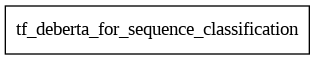

In [29]:
from keras.utils import plot_model

plot_model(model)

# Model Training Step

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [31]:
num_epochs = 2
batches_per_epoch = len(tokenized_dataset["train"]) // BATCH_SIZE
total_train_steps = int(batches_per_epoch * num_epochs)

In [32]:
optimizer, schedule = create_optimizer(init_lr=2e-5,num_warmup_steps=0, num_train_steps=total_train_steps)

In [33]:
model.compile(optimizer=optimizer,
    metrics=["accuracy"])

# model.compile(optimizer='adam',
#     metrics=["accuracy"])

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [34]:
history=model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=2
    # ,callbacks=callback
    )

Epoch 1/2


Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


1211/1211 [==============================] - 372s 235ms/step - loss: 0.2296 - accuracy: 0.9494 - val_loss: 0.0095 - val_accuracy: 0.9981
Epoch 2/2
1211/1211 [==============================] - 261s 216ms/step - loss: 0.0087 - accuracy: 0.9988 - val_loss: 0.0019 - val_accuracy: 0.9995


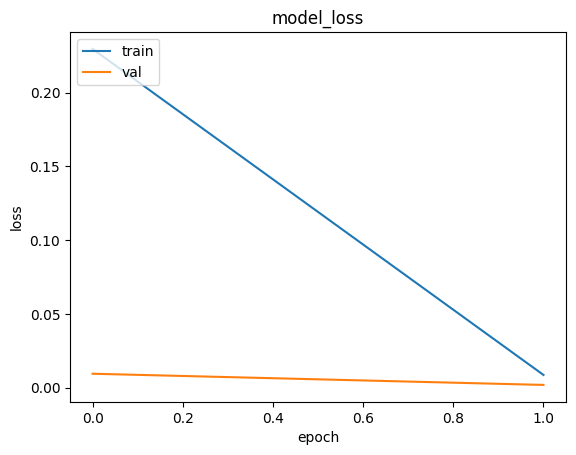

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

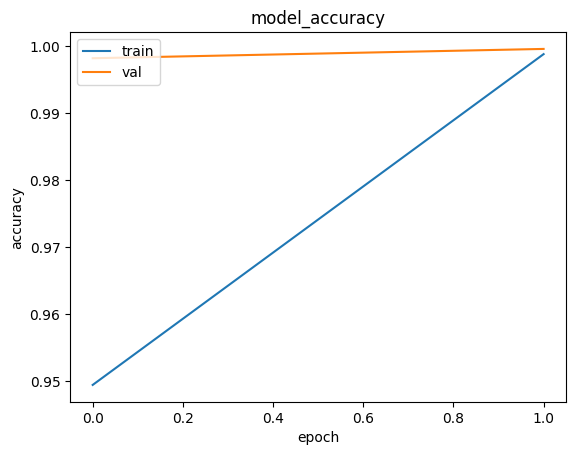

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluation of the Matrix

In [37]:
predicted = []
labels = []

for input, label in val_dataset:
  predicted.append(model(**input).logits)
  labels.append(label.numpy())

In [38]:
print(predicted)
print(labels)

[<tf.Tensor: shape=(16, 27), dtype=float32, numpy=
array([[-1.90184861e-01, -5.20573333e-02, -8.51338804e-01,
        -6.84224784e-01,  3.73691209e-02, -9.47105646e-01,
        -2.18659848e-01, -1.51256645e+00, -1.12215507e+00,
        -3.25863898e-01,  8.81057835e+00, -1.85647452e+00,
        -1.85682738e+00,  2.73756474e-01,  4.61661637e-01,
        -2.70166453e-02, -7.58584887e-02, -7.49992371e-01,
        -1.37406504e+00, -2.87963390e-01, -8.02794755e-01,
        -5.01591504e-01, -7.89498448e-01, -1.12435973e+00,
         5.94426036e-01, -1.08136702e+00, -3.76874208e-01],
       [-1.03317726e+00, -9.19480920e-01, -1.61571348e+00,
        -5.31101227e-01, -3.80256563e-01, -1.12458599e+00,
        -1.03625131e+00, -1.28232741e+00, -1.49342418e+00,
        -9.83949780e-01, -1.46934509e+00,  6.31017089e-02,
        -1.66966927e+00,  9.46084404e+00, -1.26845944e+00,
        -1.26492298e+00, -1.42579901e+00, -1.47355342e+00,
        -1.33266711e+00, -1.30882227e+00, -6.25587553e-02,
    

In [39]:
print(tf.argmax(predicted[:-1],axis=-1).numpy())
print(labels[:-1])

[[10 13  4 ... 19  4 21]
 [ 3  4  8 ... 24 12 19]
 [21  7  0 ... 21  8  4]
 ...
 [21 24  8 ...  3  8  4]
 [25  4  4 ...  9 12 23]
 [20  6 21 ...  9 21  6]]
[array([10, 13,  4, 23,  6, 19, 25, 11, 20, 21, 21,  9,  0, 19,  4, 21]), array([ 3,  4,  8,  6,  8,  4,  8, 23,  3, 12,  3,  3,  4, 24, 12, 19]), array([21,  7,  0,  7, 19,  1, 24, 20,  9, 20,  3,  8,  9, 21,  8,  4]), array([ 0, 13, 21, 19, 24, 24,  3,  9, 23, 19, 21,  0, 20,  8,  9, 25]), array([18, 23, 21, 16, 23, 20, 12,  8, 20,  4,  9, 21,  4,  9,  3, 21]), array([20, 21,  6, 13, 21, 23, 21, 23,  4, 10,  8, 21,  4, 24, 18,  8]), array([19, 16,  4,  8, 21,  4, 21,  0,  8, 16, 13,  4, 22, 18, 17,  6]), array([ 7, 18, 10,  4,  4, 23, 21, 21,  7, 21, 21,  8,  4, 12, 19,  1]), array([ 8, 20, 21, 23,  8,  7, 23, 13, 26, 21,  4,  7, 22,  7, 18,  4]), array([ 4, 20, 21, 21, 21,  0,  8, 16, 21, 19, 21, 12,  9, 13,  7,  4]), array([21, 20, 19,  4, 20, 12, 24,  3, 20, 20,  0, 18,  8,  9, 13,  3]), array([ 4, 22, 20, 13,  1, 21, 16, 21, 2

In [40]:
print(np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()]))

[10 13  4 ... 13 21 20]
[10 13  4 ... 13 21 20]


In [41]:
pred=np.concatenate([np.array(labels[:-1]).flatten(),np.array(labels[-1]).flatten()])
lab=np.concatenate([np.argmax(predicted[:-1], axis = -1).flatten(), np.argmax(predicted[-1], axis = -1).flatten()])

[[ 57   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0  12   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0  42   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 213   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  16   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  41   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 102   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 211   0   0   0   0   0   0   0   0   0
    0   0   0   0   0 

Text(0.5, 146.7222222222222, 'Predicted')

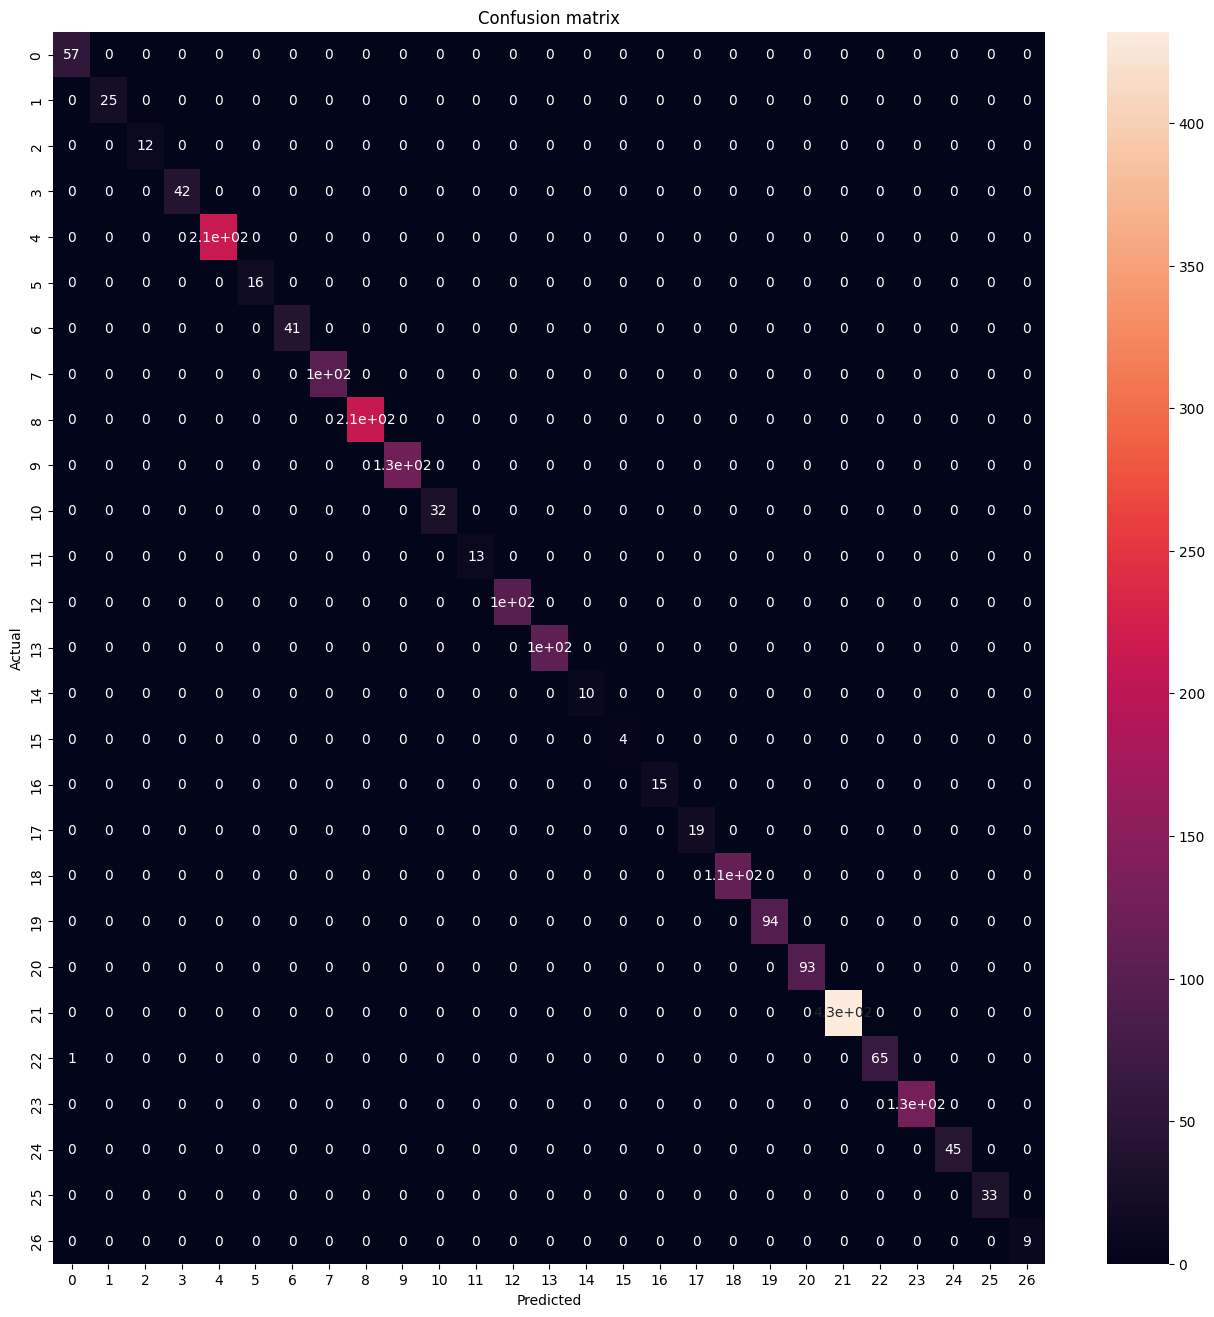

In [42]:
cm = confusion_matrix(lab, pred)
print(cm)
plt.figure(figsize=(16,16))

sns.heatmap(cm, annot=True,)
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Saving Our Model

In [43]:
!mkdir -p saved_model
model.save('saved_model/intent_classifier')

# Testing the Model

In [55]:
inputs_strings=[
    "Please how do i go about the account creation? ",
                    "After setting up my account, i feel like i need to change it. How do i go about that?",
                    "how do i know how much i need to pay?",
                    "purchased a product, which i now want to change",
                    "Could you help me with checking the status of my refund?",
                    "I need help to check the cancellation penalties",
                     "the show was postponed, how do I get a reimbursement?",
                "can u ask an agent how i could set up my fucking shipping address, please?",
                "	the show was postponed, what do i have to do to obtain a reimbursement?",
                "I can't find my invoices, what do I have to do to see them?"
"you're not helping, I need help speaking with someone"
                
]

In [56]:
inputs = tokenizer(["Please how do i go about the account creation? ",
                    "After setting up my account, i feel like i need to change it. How do i go about that?",
                    "how do i know how much i need to pay?",
                    "purchased a product, which i now want to change",
                    "Could you help me with checking the status of my refund?",
                    "I need help to check the cancellation penalties",
                     "the show was postponed, how do I get a reimbursement?",
                "can u ask an agent how i could set up my fucking shipping address, please?",
                "	the show was postponed, what do i have to do to obtain a reimbursement?",
                "I can't find my invoices, what do I have to do to see them?"
"you're not helping, I need help speaking with someone"
                    
                    ], padding=True,return_tensors="tf")

logits = model(**inputs).logits
outputs=tf.argmax(logits,axis=-1).numpy()

In [57]:
print(outputs)

[ 8  2  1 19  3  6 20 26 20 12]


In [58]:
reverse_dict_intents={i:intents[i] for i in range(len(intents))}
print(reverse_dict_intents)

{0: 'review', 1: 'check_payment_methods', 2: 'edit_account', 3: 'track_refund', 4: 'contact_customer_service', 5: 'change_shipping_address', 6: 'check_cancellation_fee', 7: 'delete_account', 8: 'create_account', 9: 'track_order', 10: 'delivery_options', 11: 'registration_problems', 12: 'check_invoices', 13: 'contact_human_agent', 14: 'place_order', 15: 'cancel_order', 16: 'delivery_period', 17: 'newsletter_subscription', 18: 'recover_password', 19: 'change_order', 20: 'get_refund', 21: 'payment_issue', 22: 'complaint', 23: 'get_invoice', 24: 'check_refund_policy', 25: 'switch_account', 26: 'set_up_shipping_address'}


In [59]:
results=[]
for i in outputs:
  print(reverse_dict_intents[i])
  results.append(reverse_dict_intents[i])

create_account
edit_account
check_payment_methods
change_order
track_refund
check_cancellation_fee
get_refund
set_up_shipping_address
get_refund
check_invoices


In [60]:
data ={
    "Query":inputs_strings,
    "Prediciton Intent":results
}
pprint(data)

{'Prediciton Intent': ['create_account',
                       'edit_account',
                       'check_payment_methods',
                       'change_order',
                       'track_refund',
                       'check_cancellation_fee',
                       'get_refund',
                       'set_up_shipping_address',
                       'get_refund',
                       'check_invoices'],
 'Query': ['Please how do i go about the account creation? ',
           'After setting up my account, i feel like i need to change it. How '
           'do i go about that?',
           'how do i know how much i need to pay?',
           'purchased a product, which i now want to change',
           'Could you help me with checking the status of my refund?',
           'I need help to check the cancellation penalties',
           'the show was postponed, how do I get a reimbursement?',
           'can u ask an agent how i could set up my fucking shipping address, '
       

# 5 to 10 running examples.

In [61]:
import pandas as pd

df = pd.DataFrame(data)
df

,Query,Prediciton Intent
0,Please how do i go about the account creation?,create_account
1,"After setting up my account, i feel like i nee...",edit_account
2,how do i know how much i need to pay?,check_payment_methods
3,"purchased a product, which i now want to change",change_order
4,Could you help me with checking the status of ...,track_refund
5,I need help to check the cancellation penalties,check_cancellation_fee
6,"the show was postponed, how do I get a reimbur...",get_refund
7,can u ask an agent how i could set up my fucki...,set_up_shipping_address
8,"\tthe show was postponed, what do i have to do...",get_refund
9,"I can't find my invoices, what do I have to do...",check_invoices
